<a href="https://colab.research.google.com/github/NandiniLReddy/Meta-Sapiens/blob/main/Meta_Sapiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Meta Sapeins deployed by Nandini Lokesh Reddy

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 107.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 8.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 112.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 25.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install spaces

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 6.0.0
    Uninstalling psutil-6.0.0:
      Successfully uninstalled psutil-6.0.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import colorsys
import os

import gradio as gr
import matplotlib.colors as mcolors
import numpy as np
import spaces
import torch
from gradio.themes.utils import sizes
from PIL import Image
from torchvision import transforms

In [ ]:
SAPIENS_LITE_MODELS_URL = {
    "depth": {
        "sapiens_0.3b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/depth/checkpoints/sapiens_0.3b/sapiens_0.3b_render_people_epoch_100_torchscript.pt2?download=true",
        "sapiens_0.6b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/depth/checkpoints/sapiens_0.6b/sapiens_0.6b_render_people_epoch_70_torchscript.pt2?download=true",
        "sapiens_1b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/depth/checkpoints/sapiens_1b/sapiens_1b_render_people_epoch_88_torchscript.pt2?download=true",
        "sapiens_2b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/depth/checkpoints/sapiens_2b/sapiens_2b_render_people_epoch_25_torchscript.pt2?download=true"
    },
    "detector": {},
    "normal": {
        "sapiens_0.3b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/normal/checkpoints/sapiens_0.3b/sapiens_0.3b_normal_render_people_epoch_66_torchscript.pt2?download=true",
        "sapiens_0.6b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/normal/checkpoints/sapiens_0.6b/sapiens_0.6b_normal_render_people_epoch_200_torchscript.pt2?download=true",
        "sapiens_1b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/normal/checkpoints/sapiens_1b/sapiens_1b_normal_render_people_epoch_115_torchscript.pt2?download=true",
        "sapiens_2b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/normal/checkpoints/sapiens_2b/sapiens_2b_normal_render_people_epoch_70_torchscript.pt2?download=true"
    },
    "pose": {
        "sapiens_1b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/pose/checkpoints/sapiens_1b/sapiens_1b_goliath_best_goliath_AP_640_torchscript.pt2?download=true"
    },
    "seg": {
        "sapiens_0.3b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/seg/checkpoints/sapiens_0.3b/sapiens_0.3b_goliath_best_goliath_mIoU_7673_epoch_194_torchscript.pt2?download=true",
        "sapiens_0.6b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/seg/checkpoints/sapiens_0.6b/sapiens_0.6b_goliath_best_goliath_mIoU_7777_epoch_178_torchscript.pt2?download=true",
        "sapiens_1b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/seg/checkpoints/sapiens_1b/sapiens_1b_goliath_best_goliath_mIoU_7994_epoch_151_torchscript.pt2?download=true",
        "sapiens_2b": "https://huggingface.co/facebook/sapiens/resolve/main/sapiens_lite_host/torchscript/seg/checkpoints/sapiens_2b/sapiens_2b_goliath_best_goliath_mIoU_8179_epoch_181_torchscript.pt2?download=true"
    }
}

SAPIENS_LITE_MODELS_PATH = {
    "depth": {
        "sapiens_0.3b": "checkpoints/depth/sapiens_0.3b_torchscript.pt2",
        "sapiens_0.6b": "checkpoints/depth/sapiens_0.6b_torchscript.pt2",
        "sapiens_1b": "checkpoints/depth/sapiens_1b_torchscript.pt2",
        "sapiens_2b": "checkpoints/depth/sapiens_2b_torchscript.pt2"
    },
    "detector": {},
    "normal": {
        "sapiens_0.3b": "checkpoints/normal/sapiens_0.3b_torchscript.pt2",
        "sapiens_0.6b": "checkpoints/normal/sapiens_0.6b_torchscript.pt2",
        "sapiens_1b": "checkpoints/normal/sapiens_1b_torchscript.pt2",
        "sapiens_2b": "checkpoints/normal/sapiens_2b_torchscript.pt2"
    },
    "pose": {
        "sapiens_1b": "checkpoints/pose/sapiens_1b_torchscript.pt2"
    },
    "seg": {
        "sapiens_0.3b": "checkpoints/seg/sapiens_0.3b_torchscript.pt2",
        "sapiens_0.6b": "checkpoints/seg/sapiens_0.6b_torchscript.pt2",
        "sapiens_1b": "checkpoints/seg/sapiens_1b_torchscript.pt2",
        "sapiens_2b": "checkpoints/seg/sapiens_2b_torchscript.pt2"
    }
}

LABELS_TO_IDS = {
    "Background": 0,
    "Apparel": 1,
    "Face Neck": 2,
    "Hair": 3,
    "Left Foot": 4,
    "Left Hand": 5,
    "Left Lower Arm": 6,
    "Left Lower Leg": 7,
    "Left Shoe": 8,
    "Left Sock": 9,
    "Left Upper Arm": 10,
    "Left Upper Leg": 11,
    "Lower Clothing": 12,
    "Right Foot": 13,
    "Right Hand": 14,
    "Right Lower Arm": 15,
    "Right Lower Leg": 16,
    "Right Shoe": 17,
    "Right Sock": 18,
    "Right Upper Arm": 19,
    "Right Upper Leg": 20,
    "Torso": 21,
    "Upper Clothing": 22,
    "Lower Lip": 23,
    "Upper Lip": 24,
    "Lower Teeth": 25,
    "Upper Teeth": 26,
    "Tongue": 27,
}

In [ ]:
import colorsys
import matplotlib.colors as mcolors
import numpy as np
from PIL import Image

def get_palette(num_cls):
    palette = [0] * (256 * 3)
    palette[0:3] = [0, 0, 0]

    for j in range(1, num_cls):
        hue = (j - 1) / (num_cls - 1)
        saturation = 1.0
        value = 1.0 if j % 2 == 0 else 0.5
        rgb = colorsys.hsv_to_rgb(hue, saturation, value)
        r, g, b = [int(x * 255) for x in rgb]
        palette[j * 3 : j * 3 + 3] = [r, g, b]

    return palette


def create_colormap(palette):
    colormap = np.array(palette).reshape(-1, 3) / 255.0
    return mcolors.ListedColormap(colormap)


def visualize_mask_with_overlay(img: Image.Image, mask: Image.Image, labels_to_ids: dict[str, int], alpha=0.5):
    img_np = np.array(img.convert("RGB"))
    mask_np = np.array(mask)

    num_cls = len(labels_to_ids)
    palette = get_palette(num_cls)
    colormap = create_colormap(palette)

    overlay = np.zeros((*mask_np.shape, 3), dtype=np.uint8)
    for label, idx in labels_to_ids.items():
        if idx != 0:
            overlay[mask_np == idx] = np.array(colormap(idx)[:3]) * 255

    blended = Image.fromarray(np.uint8(img_np * (1 - alpha) + overlay * alpha))

    return blended

def resize_image(pil_image, target_size):
    """
    Resize a PIL image while maintaining its aspect ratio.

    Args:
    pil_image (PIL.Image): The input image.
    target_size (tuple): The target size as (width, height).

    Returns:
    PIL.Image: The resized image.
    """
    original_width, original_height = pil_image.size
    target_width, target_height = target_size

    # Calculate aspect ratios
    aspect_ratio = original_width / original_height
    target_aspect = target_width / target_height

    if aspect_ratio > target_aspect:
        # Image is wider than target, scale based on width
        new_width = target_width
        new_height = int(new_width / aspect_ratio)
    else:
        # Image is taller than target, scale based on height
        new_height = target_height
        new_width = int(new_height * aspect_ratio)

    # Resize the image
    resized_image = pil_image.resize((new_width, new_height), Image.LANCZOS)

    # Create a new image with the target size and paste the resized image
    new_image = Image.new('RGB', target_size, (0, 0, 0))
    paste_x = (target_width - new_width) // 2
    paste_y = (target_height - new_height) // 2
    new_image.paste(resized_image, (paste_x, paste_y))

    return new_image


In [ ]:
if torch.cuda.is_available() and torch.cuda.get_device_properties(0).major >= 8:
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

# Segmentation

In [ ]:
import os

# Path to the checkpoints folder
checkpoints_dir = 'checkpoints'

# Check if the directory exists
if os.path.exists(checkpoints_dir):
    print(f"Contents of {checkpoints_dir}:")

    # List all files and directories in the folder
    for item in os.listdir(checkpoints_dir):
        print(item)
else:
    print(f"The directory {checkpoints_dir} does not exist.")


Contents of checkpoints:
seg


In [ ]:
def get_model_path(task, version):
    try:
        model_path = SAPIENS_LITE_MODELS_PATH[task][version]
        if not os.path.exists(model_path):
            print(f"Warning: The model file does not exist at {model_path}")
        return model_path
    except KeyError as e:
        print(f"Error: Invalid task or version. {e}")
        return None

# Example usage
TASK = 'seg'
VERSION = 'sapiens_0.3b'

model_path = get_model_path(TASK, VERSION)
print(model_path)

checkpoints/seg/sapiens_0.3b_torchscript.pt2


In [ ]:
model = torch.jit.load(model_path)
model.eval()
model.to("cuda")

RecursiveScriptModule(
  original_name=EncoderDecoder
  (data_preprocessor): RecursiveScriptModule(original_name=SegDataPreProcessor)
  (backbone): RecursiveScriptModule(
    original_name=VisionTransformer
    (patch_embed): RecursiveScriptModule(
      original_name=PatchEmbed
      (adaptive_padding): RecursiveScriptModule(original_name=AdaptivePadding)
      (projection): RecursiveScriptModule(original_name=Conv2d)
    )
    (drop_after_pos): RecursiveScriptModule(original_name=Dropout)
    (layers): RecursiveScriptModule(
      original_name=ModuleList
      (0): RecursiveScriptModule(
        original_name=TransformerEncoderLayer
        (ln1): RecursiveScriptModule(original_name=LayerNorm)
        (attn): RecursiveScriptModule(
          original_name=MultiheadAttention
          (qkv): RecursiveScriptModule(original_name=Linear)
          (proj): RecursiveScriptModule(original_name=Linear)
          (proj_drop): RecursiveScriptModule(original_name=Dropout)
          (out_drop):

In [ ]:
@torch.inference_mode()
def run_model(input_tensor, height, width):
    output = model(input_tensor)
    output = torch.nn.functional.interpolate(output, size=(height, width), mode="bilinear", align_corners=False)
    _, preds = torch.max(output, 1)
    return preds

In [ ]:
transform_fn = transforms.Compose(
    [
        transforms.Resize((1024, 768)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [ ]:
def segment(image):
    input_tensor = transform_fn(image).unsqueeze(0).to("cuda")

    preds = run_model(input_tensor, height=image.height, width=image.width)
    mask = preds.squeeze(0).cpu().numpy()

    mask_image = Image.fromarray(mask.astype("uint8"))
    blended_image = visualize_mask_with_overlay(image, mask_image, LABELS_TO_IDS, alpha=0.5)
    return blended_image

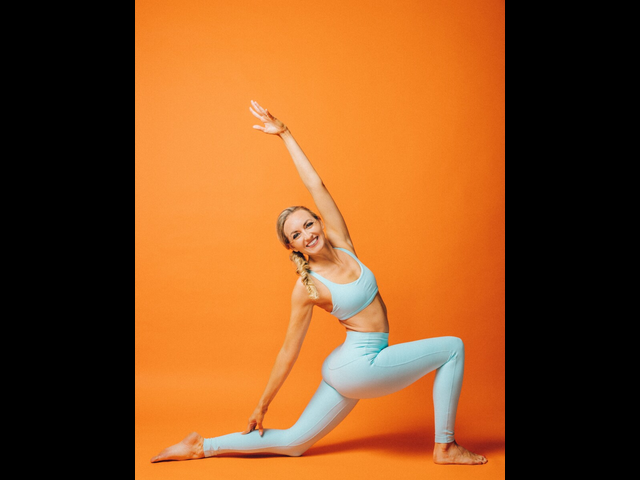

In [ ]:
pil_image = Image.open('sapiens2.jpg')

if pil_image.mode == 'RGBA':
    pil_image = pil_image.convert('RGB')

resized_pil_image = resize_image(pil_image, (640, 480))
resized_pil_image

In [ ]:
output_image = segment(pil_image)

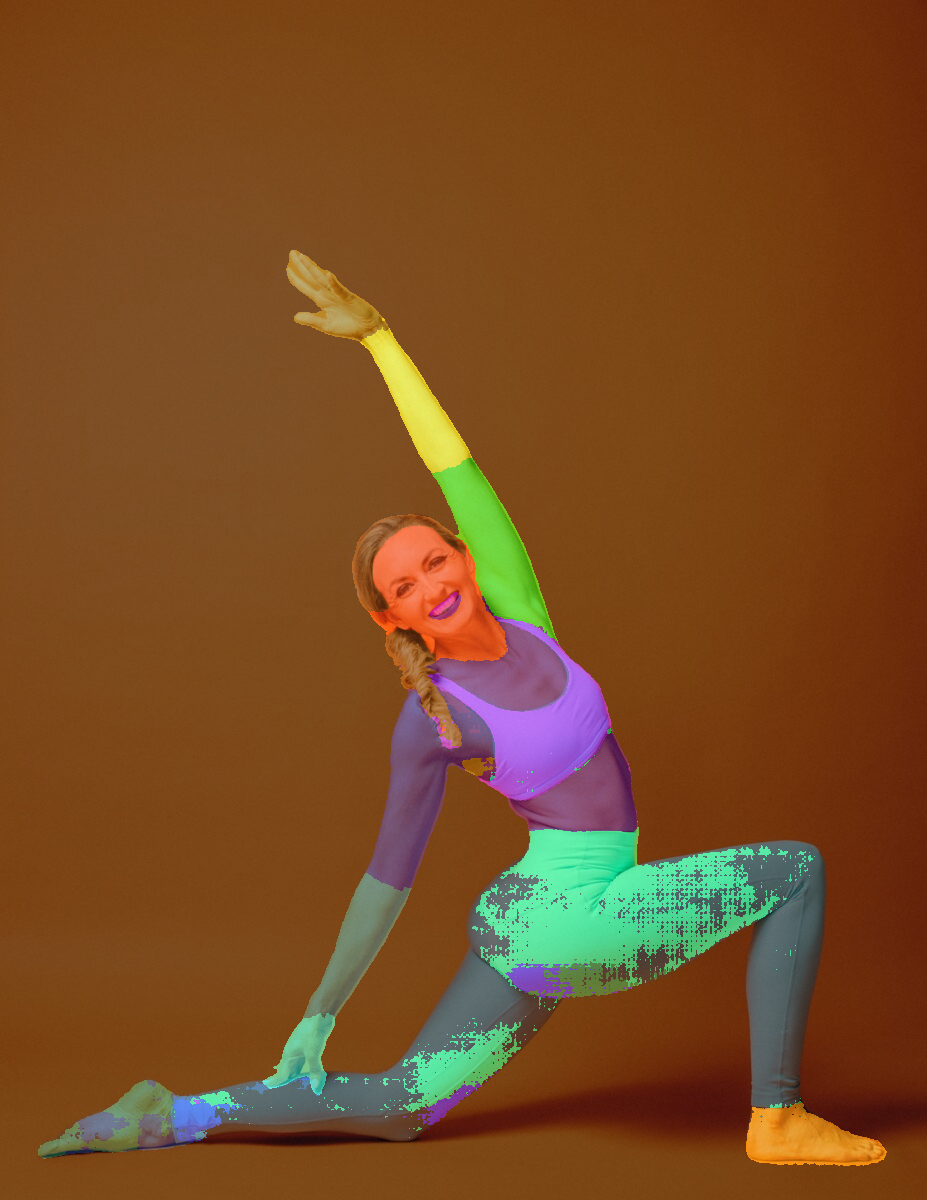

In [ ]:
output_image

# Pose

In [ ]:
pil_image = Image.open('sapiens2.jpg')

if pil_image.mode == 'RGBA':
    pil_image = pil_image.convert('RGB')

resized_pil_image = resize_image(pil_image, (640, 480))
resized_pil_image

In [ ]:
model = torch.jit.load(model_path)
model.eval()
model.to("cuda")

In [ ]:
def get_pose(image, pose_estimator, input_shape=(3, 1024, 768), device="cuda"):
    # Preprocess the image
    img = preprocess_image(image, input_shape)

    # Run the model
    with torch.no_grad():
        heatmap = pose_estimator(img.to(device))

    # Post-process the output
    keypoints, keypoint_scores = udp_decode(heatmap[0].cpu().float().numpy(),
                                            input_shape[1:],
                                            (input_shape[1] // 4, input_shape[2] // 4))

    # Scale keypoints to original image size
    scale_x = image.width / input_shape[2]
    scale_y = image.height / input_shape[1]
    keypoints[:, 0] *= scale_x
    keypoints[:, 1] *= scale_y

    # Visualize the keypoints on the original image
    pose_image = visualize_keypoints(image, keypoints, keypoint_scores)
    return pose_image

def preprocess_image(image, input_shape):
    # Resize and normalize the image
    img = image.resize((input_shape[2], input_shape[1]))
    img = np.array(img).transpose(2, 0, 1)
    img = torch.from_numpy(img).float()
    img = img[[2, 1, 0], ...] # RGB to BGR
    mean = torch.tensor([123.675, 116.28, 103.53]).view(3, 1, 1)
    std = torch.tensor([58.395, 57.12, 57.375]).view(3, 1, 1)
    img = (img - mean) / std
    return img.unsqueeze(0)

def udp_decode(heatmap, img_size, heatmap_size):
    # This is a simplified version. You might need to implement the full UDP decode logic
    h, w = heatmap_size
    keypoints = np.zeros((heatmap.shape[0], 2))
    keypoint_scores = np.zeros(heatmap.shape[0])

    for i in range(heatmap.shape[0]):
        hm = heatmap[i]
        idx = np.unravel_index(np.argmax(hm), hm.shape)
        keypoints[i] = [idx[1] * img_size[1] / w, idx[0] * img_size[0] / h]
        keypoint_scores[i] = hm[idx]

    return keypoints, keypoint_scores

def visualize_keypoints(image, keypoints, keypoint_scores, threshold=0.3):
    draw = ImageDraw.Draw(image)
    for (x, y), score in zip(keypoints, keypoint_scores):
        if score > threshold:
            draw.ellipse([(x-2, y-2), (x+2, y+2)], fill='red', outline='red')
    return image

In [ ]:
from utils.vis_utils import resize_image
pil_image = Image.open('/home/user/app/assets/image.webp')

if pil_image.mode == 'RGBA':
    pil_image = pil_image.convert('RGB')

resized_pil_image = resize_image(pil_image, (640, 480))
resized_pil_image

In [ ]:
from PIL import Image, ImageDraw

output_pose = get_pose(resized_pil_image, model)

# Depth

In [ ]:
TASK = 'depth'
VERSION = 'sapiens_0.3b'

model_path = get_model_path(TASK, VERSION)
print(model_path)

In [ ]:
model = torch.jit.load(model_path)
model.eval()
model.to("cuda")

In [ ]:
def get_depth(image, depth_model, input_shape=(3, 1024, 768), device="cuda"):
    # Preprocess the image
    img = preprocess_image(image, input_shape)

    # Run the model
    with torch.no_grad():
        result = depth_model(img.to(device))

    # Post-process the output
    depth_map = post_process_depth(result, (image.shape[0], image.shape[1]))

    # Visualize the depth map
    depth_image = visualize_depth(depth_map)

    return depth_image, depth_map

def preprocess_image(image, input_shape):
    img = cv2.resize(image, (input_shape[2], input_shape[1]), interpolation=cv2.INTER_LINEAR).transpose(2, 0, 1)
    img = torch.from_numpy(img)
    img = img[[2, 1, 0], ...].float()
    mean = torch.tensor([123.5, 116.5, 103.5]).view(-1, 1, 1)
    std = torch.tensor([58.5, 57.0, 57.5]).view(-1, 1, 1)
    img = (img - mean) / std
    return img.unsqueeze(0)

def post_process_depth(result, original_shape):
    # Check the dimensionality of the result
    if result.dim() == 3:
        result = result.unsqueeze(0)
    elif result.dim() == 4:
        pass
    else:
        raise ValueError(f"Unexpected result dimension: {result.dim()}")

    # Ensure we're interpolating to the correct dimensions
    seg_logits = F.interpolate(result, size=original_shape, mode="bilinear", align_corners=False).squeeze(0)
    depth_map = seg_logits.data.float().cpu().numpy()

    # If depth_map has an extra dimension, squeeze it
    if depth_map.ndim == 3 and depth_map.shape[0] == 1:
        depth_map = depth_map.squeeze(0)

    return depth_map

def visualize_depth(depth_map):
    # Normalize the depth map
    min_val, max_val = np.nanmin(depth_map), np.nanmax(depth_map)
    depth_normalized = 1 - ((depth_map - min_val) / (max_val - min_val))

    # Convert to uint8
    depth_normalized = (depth_normalized * 255).astype(np.uint8)

    # Apply colormap
    depth_colored = cv2.applyColorMap(depth_normalized, cv2.COLORMAP_INFERNO)

    return depth_colored

# You can add the surface normal calculation if needed
def calculate_surface_normal(depth_map):
    kernel_size = 7
    grad_x = cv2.Sobel(depth_map.astype(np.float32), cv2.CV_32F, 1, 0, ksize=kernel_size)
    grad_y = cv2.Sobel(depth_map.astype(np.float32), cv2.CV_32F, 0, 1, ksize=kernel_size)
    z = np.full(grad_x.shape, -1)
    normals = np.dstack((-grad_x, -grad_y, z))

    normals_mag = np.linalg.norm(normals, axis=2, keepdims=True)
    with np.errstate(divide="ignore", invalid="ignore"):
        normals_normalized = normals / (normals_mag + 1e-5)

    normals_normalized = np.nan_to_num(normals_normalized, nan=-1, posinf=-1, neginf=-1)
    normal_from_depth = ((normals_normalized + 1) / 2 * 255).astype(np.uint8)
    normal_from_depth = normal_from_depth[:, :, ::-1]  # RGB to BGR for cv2

    return normal_from_depth

In [ ]:
from utils.vis_utils import resize_image

pil_image = Image.open('/home/user/app/assets/image.webp')

# Load and process an image
image = cv2.imread('/home/user/app/assets/frame.png')
depth_image, depth_map = get_depth(image, model)

surface_normal = calculate_surface_normal(depth_map)
cv2.imwrite("output_surface_normal.jpg", surface_normal)
# Save the results
output_im = cv2.imwrite("output_depth_image2.jpg", depth_image)

# Normal

In [ ]:
TASK = 'normal'
VERSION = 'sapiens_0.3b'

model_path = get_model_path(TASK, VERSION)
print(model_path)

In [ ]:
model = torch.jit.load(model_path)
model.eval()
model.to("cuda")

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2

def get_normal(image, normal_model, input_shape=(3, 1024, 768), device="cuda"):
    # Preprocess the image
    img = preprocess_image(image, input_shape)

    # Run the model
    with torch.no_grad():
        result = normal_model(img.to(device))

    # Post-process the output
    normal_map = post_process_normal(result, (image.shape[0], image.shape[1]))

    # Visualize the normal map
    normal_image = visualize_normal(normal_map)

    return normal_image, normal_map

def preprocess_image(image, input_shape):
    img = cv2.resize(image, (input_shape[2], input_shape[1]), interpolation=cv2.INTER_LINEAR).transpose(2, 0, 1)
    img = torch.from_numpy(img)
    img = img[[2, 1, 0], ...].float()
    mean = torch.tensor([123.5, 116.5, 103.5]).view(-1, 1, 1)
    std = torch.tensor([58.5, 57.0, 57.5]).view(-1, 1, 1)
    img = (img - mean) / std
    return img.unsqueeze(0)

def post_process_normal(result, original_shape):
    # Check the dimensionality of the result
    if result.dim() == 3:
        result = result.unsqueeze(0)
    elif result.dim() == 4:
        pass
    else:
        raise ValueError(f"Unexpected result dimension: {result.dim()}")

    # Ensure we're interpolating to the correct dimensions
    seg_logits = F.interpolate(result, size=original_shape, mode="bilinear", align_corners=False).squeeze(0)
    normal_map = seg_logits.float().cpu().numpy().transpose(1, 2, 0)  # H x W x 3
    return normal_map

def visualize_normal(normal_map):
    normal_map_norm = np.linalg.norm(normal_map, axis=-1, keepdims=True)
    normal_map_normalized = normal_map / (normal_map_norm + 1e-5)  # Add a small epsilon to avoid division by zero

    # Convert to 0-255 range and BGR format for visualization
    normal_map_vis = ((normal_map_normalized + 1) / 2 * 255).astype(np.uint8)
    normal_map_vis = normal_map_vis[:, :, ::-1]  # RGB to BGR

    return normal_map_vis

def load_normal_model(checkpoint, use_torchscript=False):
    if use_torchscript:
        return torch.jit.load(checkpoint)
    else:
        model = torch.export.load(checkpoint).module()
        model = model.to("cuda")
        model = torch.compile(model, mode="max-autotune", fullgraph=True)
        return model

In [ ]:
import cv2
import numpy as np

# Load the model
normal_model = load_normal_model(model_path, use_torchscript='_torchscript')

# Load the image
image = cv2.imread("/home/user/app/assets/image.webp")

# Get the normal map and visualization
normal_image, normal_map = get_normal(image, normal_model)

# Save the results
cv2.imwrite("output_normal_image.png", normal_image)